In [1]:
import numpy as np
from matplotlib import pyplot as plt
import labwork
from labwork import *

In [2]:
help(labwork)

Help on module labwork:

NAME
    labwork

FUNCTIONS
    bordering(V)
    
    eval_mnk(x, y)
    
    linPlot(x, y, xlabel='', ylabel='', title='', figsize=(14, 7), fontsize=15, labplot=False, plot_to_zero=False)
        Строит график измерений x,y и линейное приближение
        зависимости по МНК (y = bx + a).
        Возвращает: a, b, sigma_a, sigma_b
    
    plotIntervals(x, x_std, y, y_std, xlabel='Значения', ylabel='Номер измерения', title='', fontsize=15)
        Строит сравнительный график значений x[i] c y[i],
        где x_std[i] и y_std[i] - их стандартные отклонения
    
    plt_lab_figure(X_max, Y_max, X_min=0, Y_min=0, k_off_x=1.05, k_off_y=1.05)
    
    prodErrorR(errors)
    
    prodErrorR_degs(errors)
    
    sciPrintD(val, dErr, name=None)
    
    sciPrintR(val, relErr, name=None)
    
    sciRoundR(V, V_R, unit='')
        По числу V и его относительной погрешности V_R
        возвращает строку, в которой число округлено по
        правилам лобораторных работ
  

In [27]:
U1 = 3 # V
E1 = np.array([
    [6.4 * 0.010 / 2,  5000],
    [6.4 * 0.020 / 2, 10000],
    [4.0 * 0.050 / 2, 15000],
    [5.3 * 0.050 / 2, 20000],
    [6.9 * 0.050 / 2, 25000]
])

In [28]:
E1

array([[  3.20000000e-02,   5.00000000e+03],
       [  6.40000000e-02,   1.00000000e+04],
       [  1.00000000e-01,   1.50000000e+04],
       [  1.32500000e-01,   2.00000000e+04],
       [  1.72500000e-01,   2.50000000e+04]])

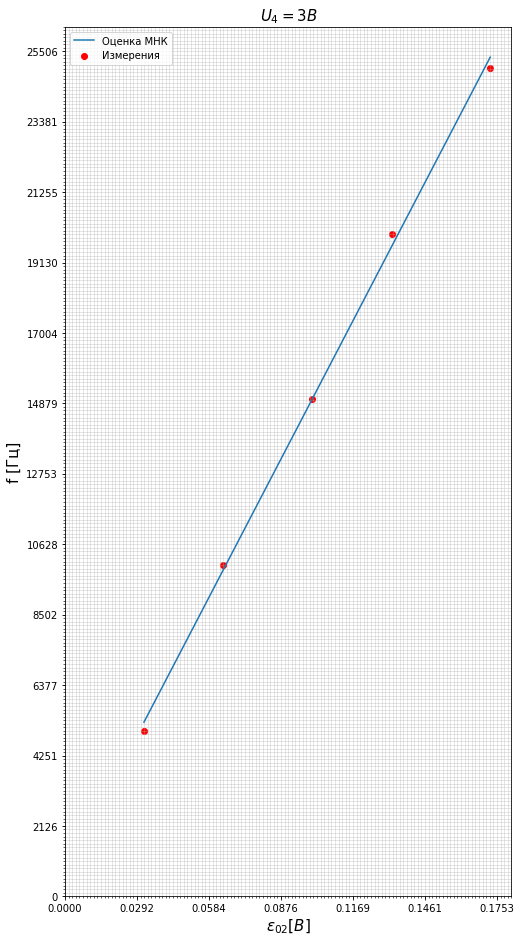

0.173364440741 0.0168180967207
[ 0.0390625   0.0390625   0.0625      0.04716981  0.03623188]
m21 = 3400 ± 200 [1e-6] (7%)
m21 = 3400 ± 200 [1e-6] (7%)
m21 = 3500 ± 300 [1e-6] (8%)
m21 = 3500 ± 300 [1e-6] (7%)
m21 = 3700 ± 200 [1e-6] (6%)
[ 0.032   0.064   0.1     0.1325  0.1725] 3 [ 0.00339531  0.00339531  0.00353678  0.00351467  0.00366056]


In [65]:
a, b, sigma_a, sigma_b = linPlot(E1[:, 0], E1[:, 1], xlabel=r"$\varepsilon_{02} [В]$",
                                 ylabel="f [Гц]",title="$U_4 = 3В$", labplot=True)
print(sigma_a / a, sigma_b/b)
a, b, sigma_a, sigma_b 

f = E1[:, 1]
U = U1
Eps = E1[:, 0]
R = 1e4
R_R = 5 * 1e-2
U_R = 1 / 30 / 2
f_R = 0.01
Eps_R = np.array([0.010 / 8,0.020 / 8,0.050 / 8,0.050 / 8,0.050 / 8,]) / Eps
print(Eps_R)
m21_R = [prodErrorR([f_R, U_R, R_R, Eps_R[i]]) for i in range(5)]

m21 = (Eps * R)/(2 * np.pi * f * U)
for i in range(5):
    print("m21 = " + sciRoundR(m21[i], m21_R[i]))
print(Eps, U, m21)

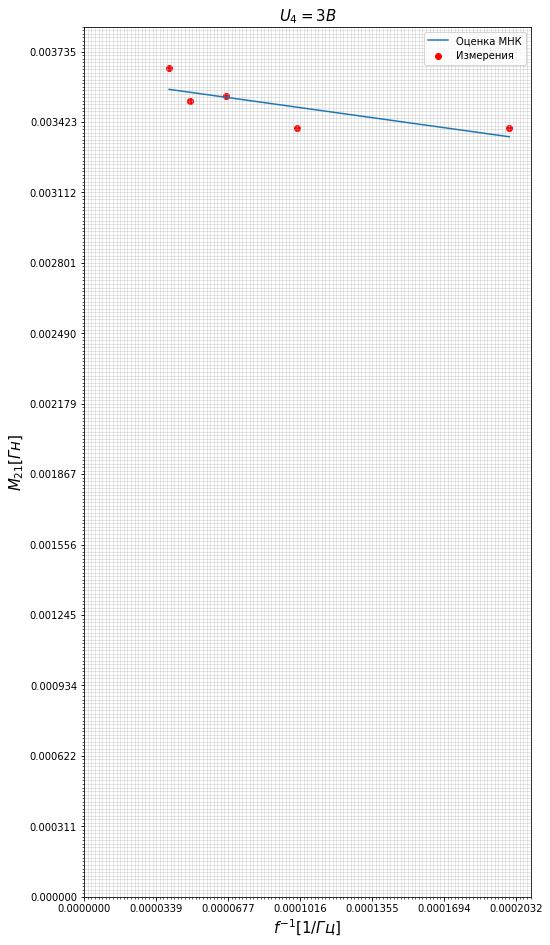

0.00789390464218 -0.376182339903
3530 ± 30 [1e-6] (0.8%)


In [66]:
a, b, sigma_a, sigma_b = linPlot(1./E1[:, 1], m21, ylabel=r"$M_{21} [Гн]$",
                                 xlabel="$f^{-1} [1/Гц]$ ",title="$U_4 = 3В$", labplot=True)
print(sigma_a / a, sigma_b/b)
a, b, sigma_a, sigma_b 
print(sciRoundR(a + 1 / 15000 * b, sigma_a/a))

In [ ]:
U2 = 2 # V
E2 = np.array([
    [4.2 * 0.010 / 2,  5000],
    [4.2 * 0.020 / 2, 10000],
    [6.4 * 0.020 / 2, 15000],
    [3.4 * 0.050 / 2, 20000],
    [4.5 * 0.050 / 2, 25000]
])

linPlot(E2[:, 0], E2[:, 1], xlabel=r"$\varepsilon_{02}  [В]$",
                                 ylabel="f [Гц]",title="$U_4 = 2В$", labplot=True)

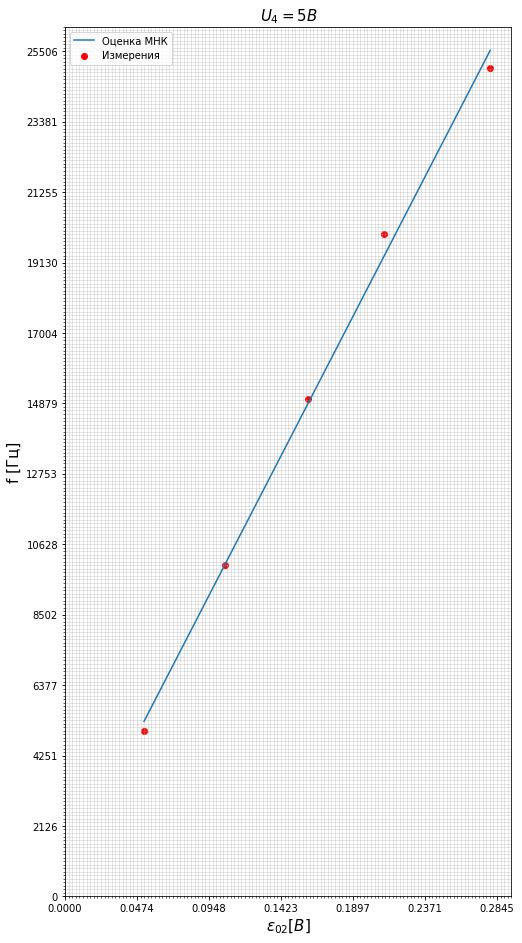

(663.75968992245544,
 88824.289405684889,
 184.15951966206507,
 2317.2805361090286)

In [63]:
U3 = 5 # V
E3 = np.array([
    [5.2 * 0.020 / 2,  5000],
    [4.2 * 0.050 / 2, 10000],
    [6.4 * 0.050 / 2, 15000],
    [4.2 * 0.100 / 2, 20000],
    [5.6 * 0.100 / 2, 25000]
])

linPlot(E3[:, 0], E3[:, 1], xlabel=r"$\varepsilon_{02} [В]$",
                                 ylabel="f [Гц]",title="$U_4 = 5В$", labplot=True)

In [64]:
f = np.array([E1[1, 1], E2[1, 1], E2[1, 1]])
print(f)
f = f.mean()
U = np.array([U1, U2, U3])
Eps = np.array([E1[1, 0], E2[1, 0], E3[1, 0]])
R = 1e4
R_R = 5*1e-2
U_R = 1 / 30 / 2
f_R = 0.01
Eps_R = np.array([0.020 / 8,0.020 / 8,0.020 / 8,]) / Eps
print(Eps_R)
m21_R = [prodErrorR([f_R, U_R, R_R, Eps_R[i]]) for i in range(3)]

m21 = (Eps * R)/(2 * np.pi * f * U)
for i in range(3):
    print("m21 = " + sciRoundR(m21[i], m21_R[i]))
print(Eps, U, m21)

[ 10000.  10000.  10000.]
[ 0.0390625   0.05952381  0.02380952]
m21 = 3400 ± 200 [1e-6] (7%)
m21 = 3300 ± 300 [1e-6] (8%)
m21 = 3300 ± 200 [1e-6] (6%)
[ 0.064  0.042  0.105] [3 2 5] [ 0.00339531  0.00334225  0.00334225]


_____________________

In [70]:
A = np.array([
    [20, 7 * 0.02, 5.6 * 0.50],
    [19, 5.7 * 0.02, 5.5 * 0.50], # Vpp, W, H
    [18, 4.8 * 0.02, 5.4 * 0.50], # 5.4 - 5.3
    [17, 7.8 * 0.01, 5.05 * 0.50],
    [16, 6.6 * 0.01, 4.8 * 0.50],
    [15, 6.0 * 0.01, 4.6 * 0.5],
    [14, 5.4 * 0.01, 4.2 * 0.5],
    [13, 5.0 * 0.01, 3.9 *0.5],
    [12, 9.2 * 0.005, 3.6 *0.5],
    [11, 8.0 * 0.005, 3.4 * 0.5],
    [10, 7.2 * 0.005, 7.6 * 0.2],
    [ 9, 6.5 * 0.005, 6.8 * 0.2],
    [ 8, 6.0 * 0.005, 6.1 * 0.2],
    [ 7, 5.3 * 0.005, 5.3 * 0.2],
    [ 6, 4.9 * 0.005, 4.6 * 0.2],
    [ 5, 4.0 * 0.005, 3.9 * 0.2],
    [ 4, 3.4 * 0.005, 6.1 * 0.1],
    [ 3, 2.7 * 0.005, 4.6 * 0.1],
    [ 2, 2.0 * 0.005, 3.1 * 0.1],
    [ 1, 1.3 * 0.005, 3.1 * 0.05]
])

In [87]:
import pandas as pd
df = pd.DataFrame()
df["Vpp"] = A[:, 0]
df["A_W [V]"] = A[:, 1]
df["A_H [V]"] = A[:, 2]
df

,Vpp,A_W [V],A_H [V]
0,20.0,0.1400,2.800
1,19.0,0.1140,2.750
2,18.0,0.0960,2.700
3,17.0,0.0780,2.525
4,16.0,0.0660,2.400
5,15.0,0.0600,2.300
6,14.0,0.0540,2.100
7,13.0,0.0500,1.950
8,12.0,0.0460,1.800
9,11.0,0.0400,1.700


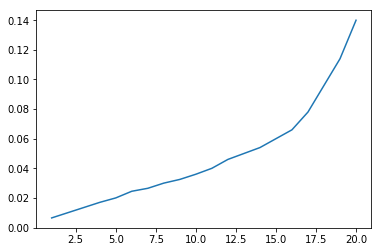

In [71]:
plt.figure()
plt.plot(A[:, 0], A[:, 1])
# plt.plot(A[:, 0], A[:, 2])
plt.show()

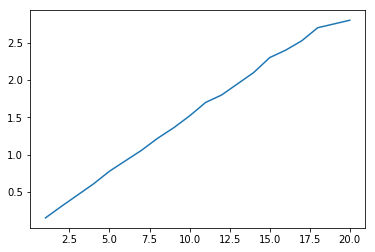

In [72]:
plt.figure()
plt.plot(A[:, 0], A[:, 2])
plt.show()

In [73]:
d1 = 18 * 1e-3
d2 =  9 * 1e-3
r_avg = (d1 + d2) / 4
N1 = 100
R1 = 51
H = A[:, 1] * N1 / (R1 * 2 * np.pi * r_avg)

In [74]:
H # мю в 100 раз больше

array([ 6.47253218,  5.27049049,  4.43830778,  3.60612507,  3.0513366 ,
        2.77394236,  2.49654813,  2.31161864,  2.12668915,  1.84929491,
        1.66436542,  1.50255211,  1.38697118,  1.22515788,  1.13269313,
        0.92464745,  0.78595034,  0.62413703,  0.46232373,  0.30051042])

In [75]:
C = 0.22 * 1e-6
N2 = 200
h = 5 * 1e-3
R2 = 4.3 * 1e3
S = h * (d1 - d2) / 2
B = A[:, 2] * C * R2 / (S * N2)

In [76]:
B

array([ 0.58862222,  0.57811111,  0.5676    ,  0.53081111,  0.50453333,
        0.48351111,  0.44146667,  0.40993333,  0.3784    ,  0.35737778,
        0.31953778,  0.28590222,  0.25647111,  0.22283556,  0.19340444,
        0.16397333,  0.12823556,  0.09670222,  0.06516889,  0.03258444])

In [77]:
mu0 = 4*np.pi * 1e-7

In [78]:
J = B / mu0 - H
mu = B / H / mu0

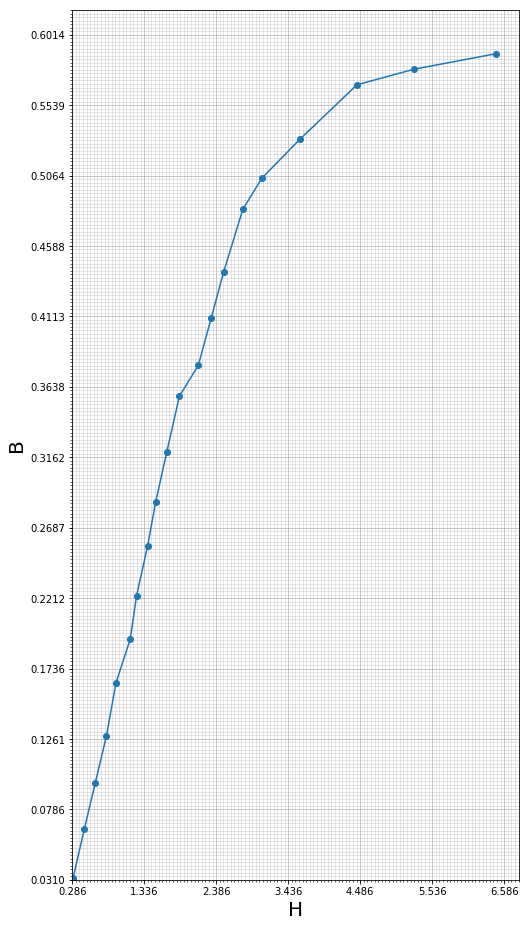

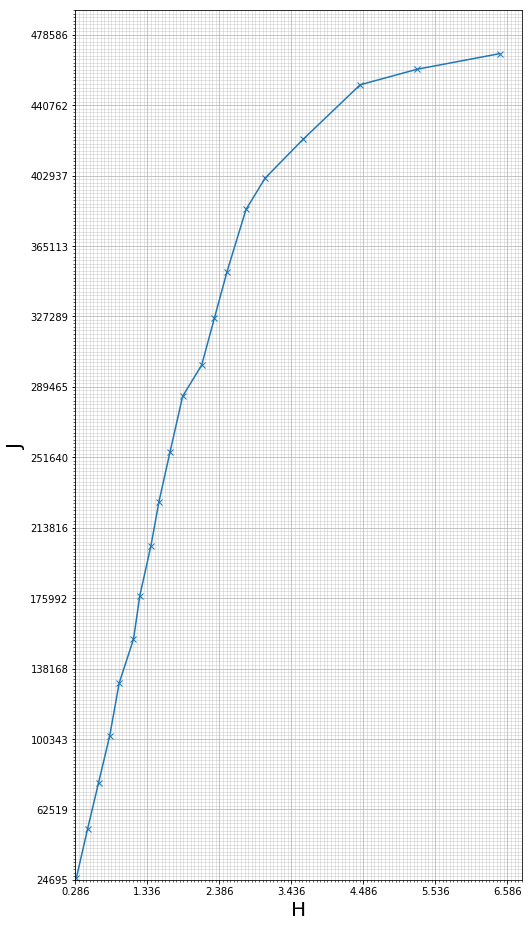

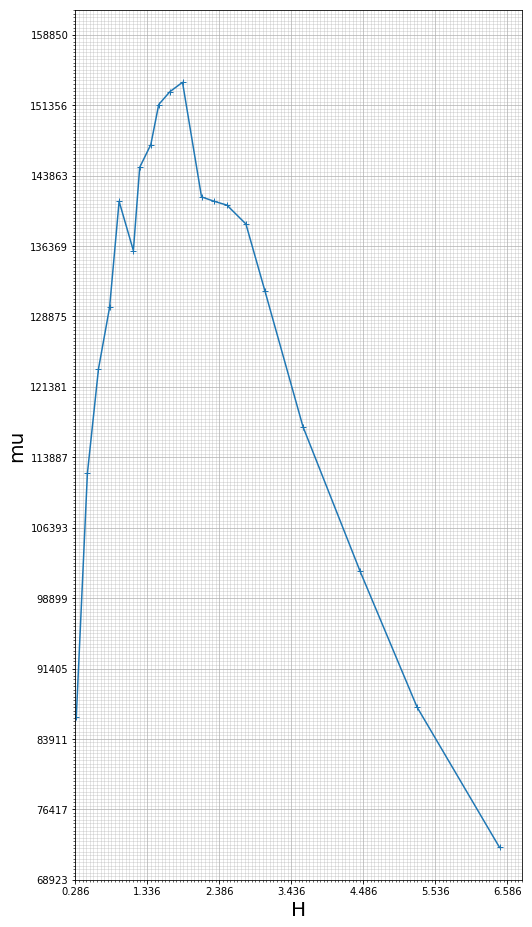

In [82]:
plt_lab_figure(H.max(), B.max(), X_min=H.min(), Y_min=B.min())
plt.plot(H, B, "-o")
plt.xlabel("H", fontsize=20)
plt.ylabel("B", fontsize=20)
plt.show()

plt_lab_figure(H.max(), J.max(), X_min=H.min(), Y_min=J.min())
plt.plot(H, J, "-x")
plt.xlabel("H", fontsize=20)
plt.ylabel("J", fontsize=20)
plt.show()

plt_lab_figure(H.max(), mu.max(), X_min=H.min(), Y_min=mu.min())
plt.plot(H, mu, "-+")
plt.xlabel("H", fontsize=20)
plt.ylabel("mu", fontsize=20)

plt.show()

In [80]:
mu.max()

153784.12499999997

In [81]:
mu.mean()

127536.70995470454